## Imports

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, \
                                  StandardScaler

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split as tts

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier

from sklearn.pipeline import Pipeline

import optuna

## Read the Data

In [8]:
df = pd.read_csv("mobil.csv", delimiter = '\t')
df

,Unnamed: 0.1,Unnamed: 0,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,...,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,0,0,1325,Yok,"1,9",Yok,"2,0",Yok,50,"0,1",...,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1,1,1046,Var,"2,8",Var,0.0,Var,58,"0,2",...,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,2,2,843,Yok,"1,3",Var,1.0,Yok,16,"0,9",...,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,3,3,894,Yok,"0,5",Var,"1,0",Var,50,"0,5",...,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,4,4,936,Yok,"1,0",Yok,1.0,Yok,18,"0,2",...,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,2012,936,Var,"2,3",Yok,5.0,Var,57,"0,2",...,6,657,938,2049.0,5,Var,Var,Yok,Ucuz,Turkuaz
2013,2013,2013,1008,Yok,"0,8",Yok,11.0,Yok,61,"1,0",...,15,1077,1122,2009.0,11,Var,Yok,Yok,Ucuz,Mavi
2014,2014,2014,1977,Yok,"1,3",Var,2.0,Yok,31,"0,4",...,6,1145,1356,2641.0,7,Yok,Yok,Yok,Pahalı,Mor
2015,2015,2015,1103,Yok,"1,0",Var,6.0,Yok,29,"0,7",...,8,990,1486,1837.0,16,Yok,Var,Var,Ucuz,Pembe


## First Look

In [9]:
# Drop Columns start with 'Unnamed'
drop_cols = [col for col in df.columns if col.startswith('Unnamed')]
df.drop(drop_cols, axis=1, inplace=True)
df

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,"1,9",Yok,"2,0",Yok,50,"0,1",146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,"2,8",Var,0.0,Var,58,"0,2",100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,"1,3",Var,1.0,Yok,16,"0,9",119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,"0,5",Var,"1,0",Var,50,"0,5",199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,"1,0",Yok,1.0,Yok,18,"0,2",153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,936,Var,"2,3",Yok,5.0,Var,57,"0,2",129,2,6,657,938,2049.0,5,Var,Var,Yok,Ucuz,Turkuaz
2013,1008,Yok,"0,8",Yok,11.0,Yok,61,"1,0",114,3,15,1077,1122,2009.0,11,Var,Yok,Yok,Ucuz,Mavi
2014,1977,Yok,"1,3",Var,2.0,Yok,31,"0,4",173,8,6,1145,1356,2641.0,7,Yok,Yok,Yok,Pahalı,Mor
2015,1103,Yok,"1,0",Var,6.0,Yok,29,"0,7",111,6,8,990,1486,1837.0,16,Yok,Var,Var,Ucuz,Pembe


Dataframe does not follow a standard. For example `OnKameraMP` has float values but separated with both `,` and `.`. 

Another thing is `MikroislemciHizi`, it has `,` in its float values. 

We will replace them with `.` as Pandas can not convert them into float values with `,`.

In [10]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2017 non-null   int64  
 1   Bluetooth            2017 non-null   object 
 2   MikroislemciHizi     2017 non-null   object 
 3   CiftHat              2017 non-null   object 
 4   OnKameraMP           2012 non-null   object 
 5   4G                   2017 non-null   object 
 6   DahiliBellek         2017 non-null   int64  
 7   Kalinlik             2017 non-null   object 
 8   Agirlik              2017 non-null   int64  
 9   CekirdekSayisi       2017 non-null   int64  
 10  ArkaKameraMP         2017 non-null   int64  
 11  CozunurlukYükseklik  2017 non-null   int64  
 12  CozunurlukGenislik   2017 non-null   int64  
 13  RAM                  2005 non-null   float64
 14  BataryaOmru          2017 non-null   int64  
 15  3G                   2013 non-null   o

As expected `MikroislemciHizi`'s dtype is object. And there are also other columns which is float but given as object.

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
pd.concat([missing_values, missing_values/df.shape[0] * 100], axis=1,
          keys=['Total', 'Percent'])

,Total,Percent
BataryaGucu,0,0.000000
Bluetooth,0,0.000000
MikroislemciHizi,0,0.000000
CiftHat,0,0.000000
OnKameraMP,5,0.247893
4G,0,0.000000
DahiliBellek,0,0.000000
Kalinlik,0,0.000000
Agirlik,0,0.000000
CekirdekSayisi,0,0.000000


In [12]:
# Check for duplicate rows
duplicated = df[df.duplicated()]

print('Before dropping duplicates:', df.shape[0])
print('Number of duplicate rows:', len(duplicated))

# Check if duplicates have any missing values
dup_nan = duplicated.isnull().sum().sum() == 0
if dup_nan:
    print('No missing values in duplicated rows')
else:
    print('Missing values in duplicated rows')

# Drop duplicates
df.drop_duplicates(inplace=True)
print('After dropping duplicates:', df.shape[0])

Before dropping duplicates: 2017
Number of duplicate rows: 17
No missing values in duplicated rows
After dropping duplicates: 2000


In [13]:
# Find numerical columns which are in object type.
# We will convert them to numeric type.
obj_cols = [col for col in df.columns if df[col].dtype == 'object']

# Now check those rows if they only have numbers, commas and dots.
# You can check this page for regex explanation: https://regex101.com/
numeric_obj_cols = [col for col in obj_cols if df[col].str.contains('^[0-9,.]*$').all()]

# Replace "," with "."
df[numeric_obj_cols] = df[numeric_obj_cols].replace(',', '.', regex=True).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   1996 non-null   o

In [14]:
# Behave as if test set does not exist. Test set will be used to evaluate model 
# performance in the end.
df_copy = df.copy()
df, df_test = tts(df, test_size=0.1, random_state=42)
print('Training set size:', len(df), ' Test set size:', len(df_test))

Training set size: 1800  Test set size: 200


## Exploratory Data Analysis

In [15]:
numerical_cols = df.describe().columns.tolist()
categorical_cols = [col for col in df.columns if col not in numerical_cols]

print('Numerical columns:', numerical_cols, 'count:', len(numerical_cols))
print('Categorical columns:', categorical_cols, 'count:', len(categorical_cols))
print('All columns count:', len(df.columns))

Numerical columns: ['BataryaGucu', 'MikroislemciHizi', 'OnKameraMP', 'DahiliBellek', 'Kalinlik', 'Agirlik', 'CekirdekSayisi', 'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM', 'BataryaOmru'] count: 12
Categorical columns: ['Bluetooth', 'CiftHat', '4G', '3G', 'Dokunmatik', 'WiFi', 'FiyatAraligi', 'Renk'] count: 8
All columns count: 20


### Distributions of Numerical Features

Number of continuous columns: 12


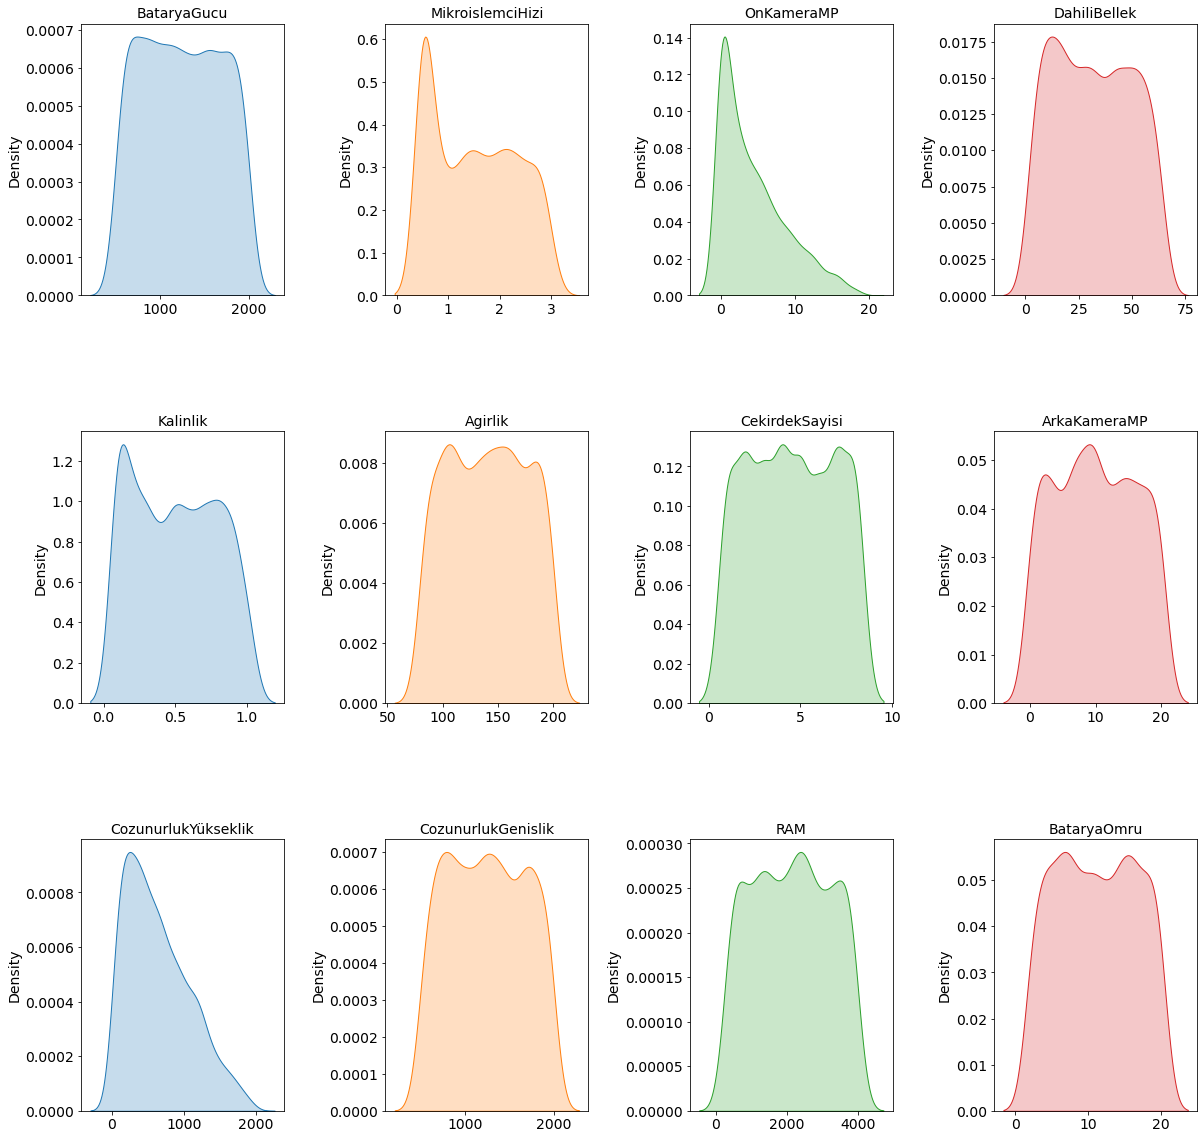

In [16]:
print('Number of continuous columns:', len(numerical_cols))

# Plot Kde plot for continuous columns using subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 20),
                         gridspec_kw={'hspace': 0.5, 'wspace': 0.5})

for i, col in enumerate(numerical_cols):
    sns.kdeplot(df[col], ax=axes[i // 4, i % 4],
                shade=True, label=col,
                color=sns.color_palette()[i % 4])
    axes[i // 4, i % 4].set_title(col, fontsize=14)
    axes[i // 4, i % 4].set_xlabel('')
    axes[i // 4, i % 4].set_ylabel('Density', fontsize=14)

    # make Ticks bigger for better readability
    axes[i // 4, i % 4].tick_params(labelsize=14)

#### Summary:
* Most of the features do not seem to follow known distributions. Some of them can be seen as uniform distribution.

* `CozunurlukYukseklik` and `OnKameraMP` follows different distributions.
 * `CozunurlukYukseklik` looks like following a skewed normal distribution. Log-transform can be applied to solve the problem of skewness.
 * `OnKameraMP` can be approximated by a Gamma distribution.

Categorical variables: Bluetooth, CiftHat, 4G, 3G, Dokunmatik, WiFi, FiyatAraligi, Renk


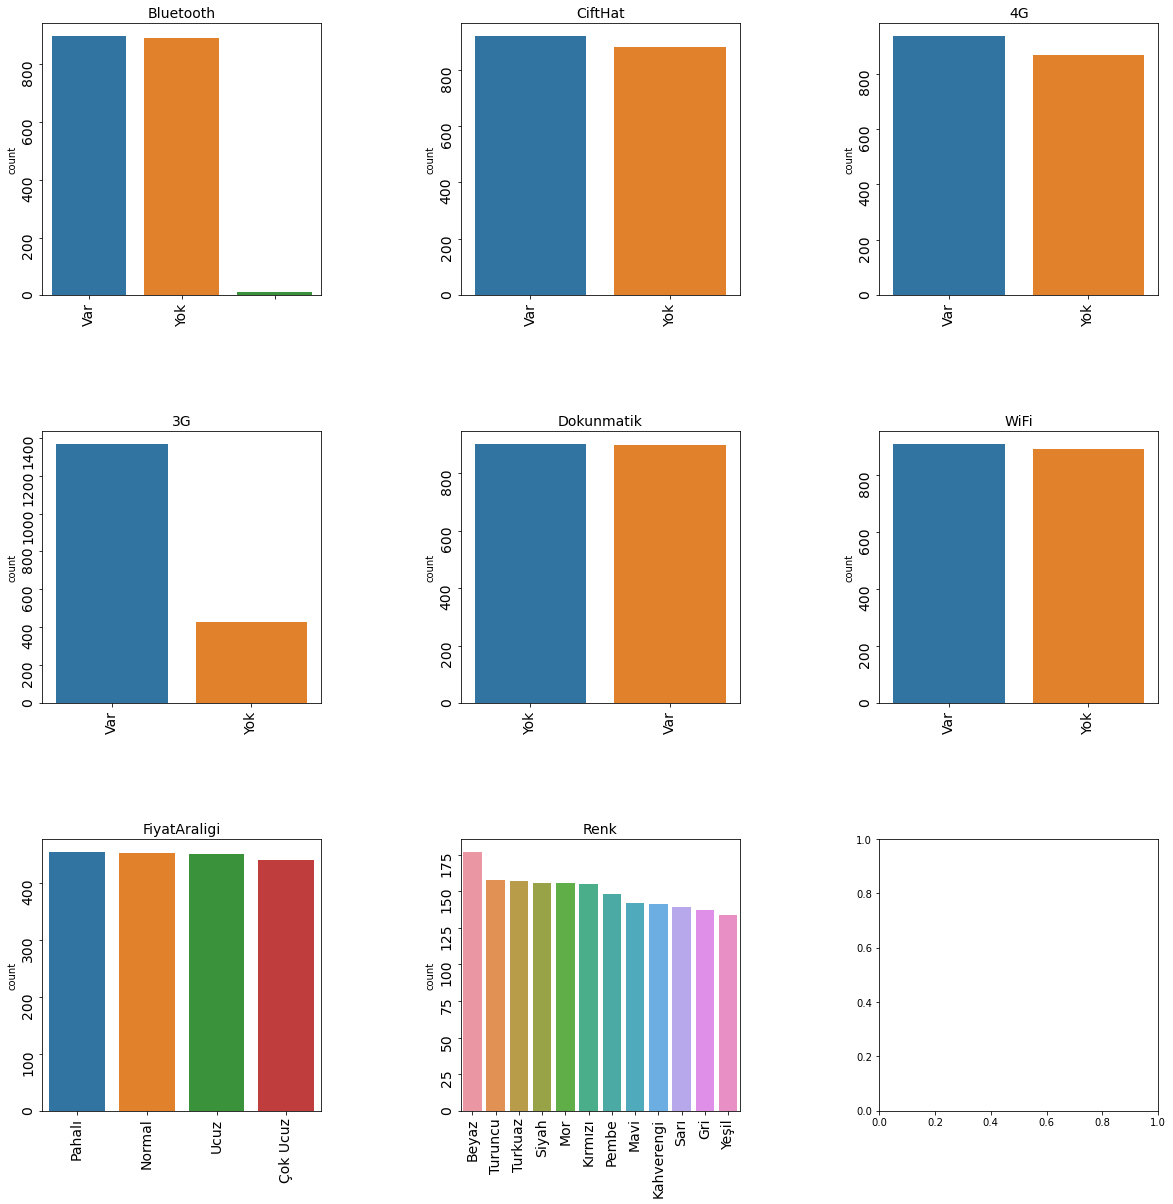

In [17]:
print('Categorical variables:', ', '.join(categorical_cols))

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20),
                         gridspec_kw={'hspace': 0.5, 'wspace': 0.5})
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i // 3, i % 3],
                  order=df[col].value_counts().index)
    axes[i // 3, i % 3].set_title(col, fontsize=14)
    axes[i // 3, i % 3].set_xlabel('')

    axes[i // 3, i % 3].tick_params(labelsize=14, labelrotation=90)

* Most of the features are distributed evenly across the dataset. However, `Bluetooth` column has a missing (`' '`)? value. We may replace it with `unknown` but this time leave it as is. 

* `OrdinalEncoder` will be used to encode categorical features and `' '` is an another category for it. So it will have no influnce in training process. It can be encoded with a value after a statistical analysis, but I'll leave it as is as there will be no in depth statistical analysis.

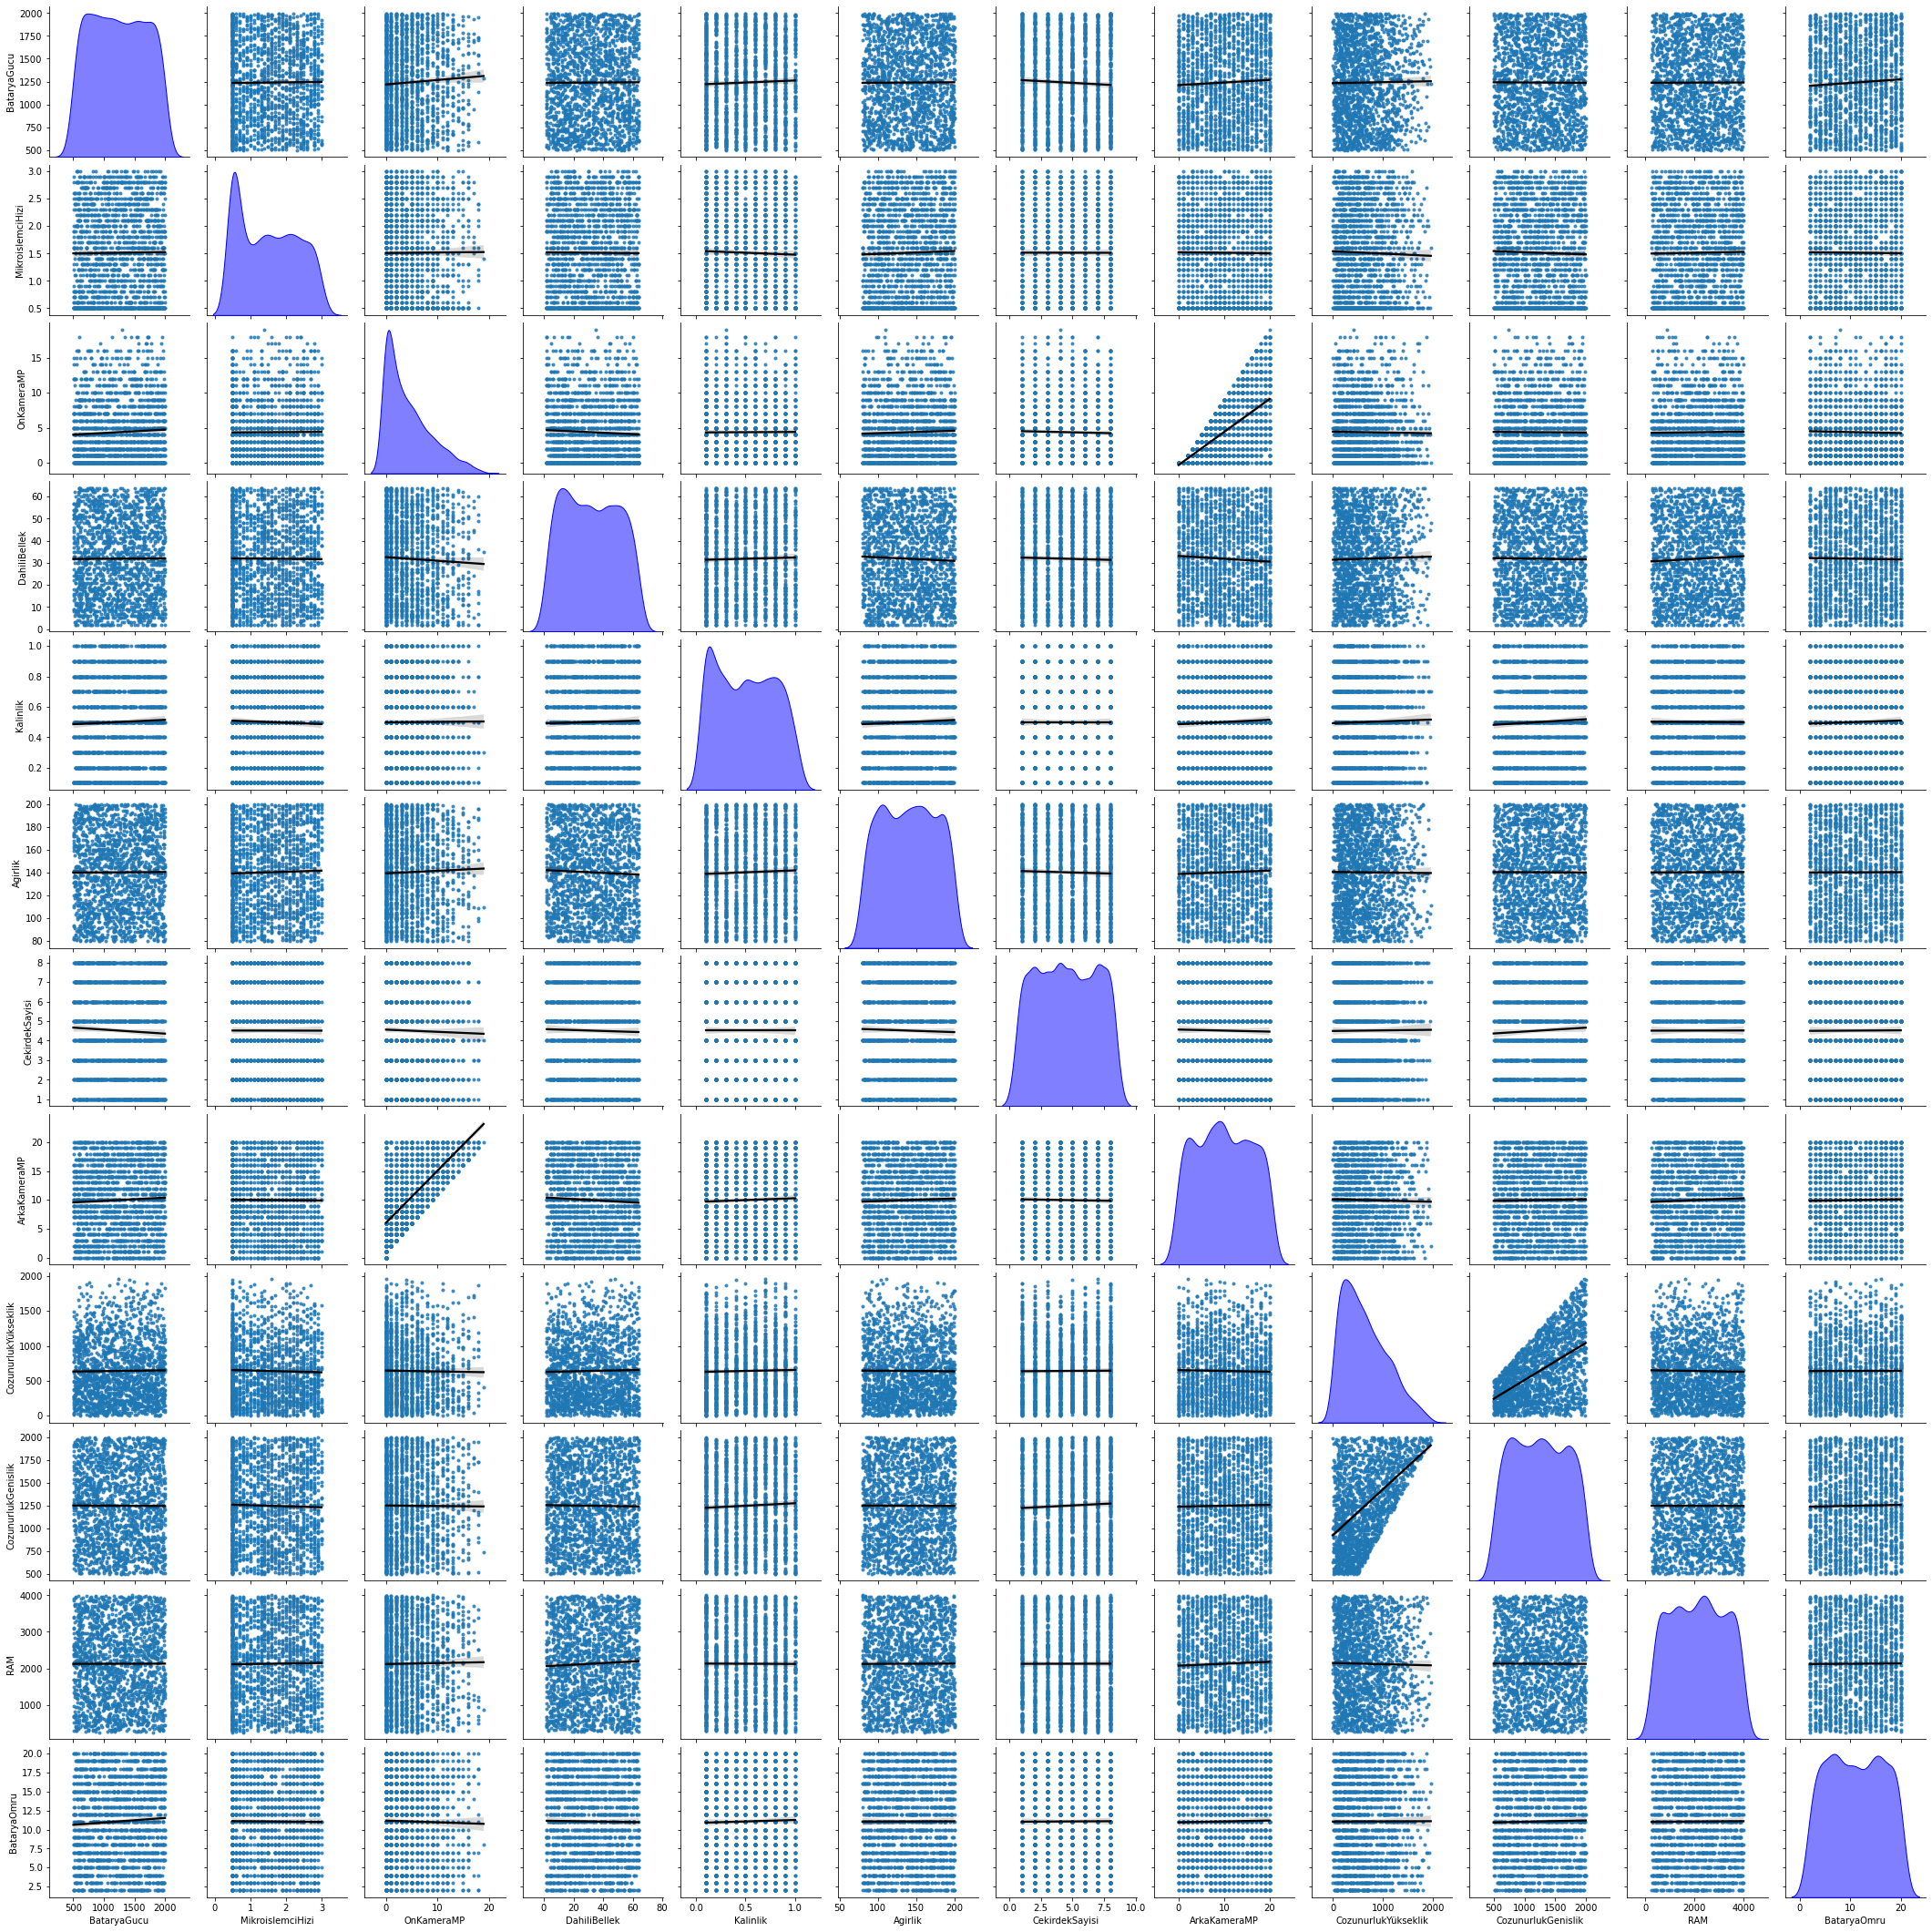

In [18]:
# Relationship between continuous variables
g = sns.pairplot(df[numerical_cols],
                 kind='reg',
                 plot_kws={'line_kws': {'color': 'black'}},
                 diag_kind='kde',
                 diag_kws={'shade': True, 'color': 'blue', 'alpha': 0.5},
                 markers='.',
                 palette='Set3');

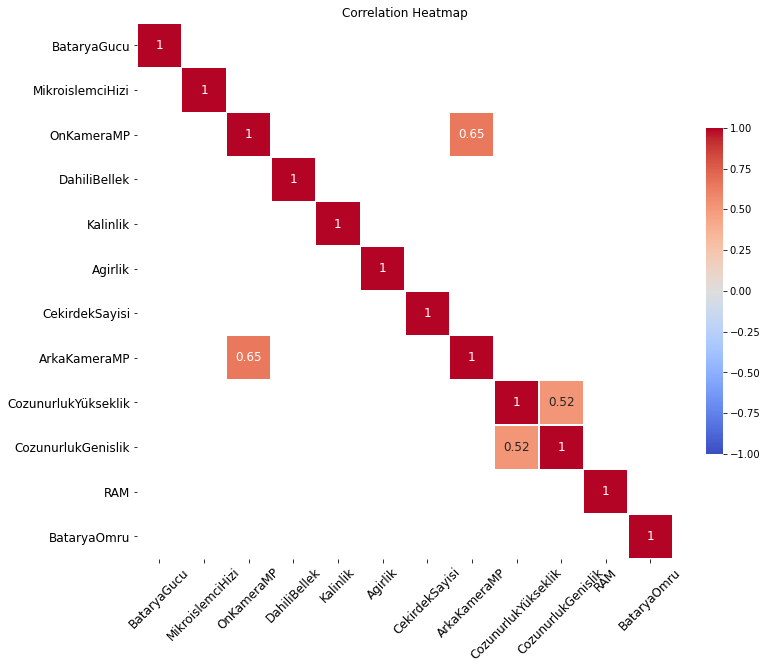

In [19]:
# Correlation heatmap which has > 0.1 correlation and < -0.1 correlation
corr = df.corr()
corr_filter = np.abs(corr) > 0.1
corr = corr.where(corr_filter)
mask = np.zeros_like(corr, dtype=np.bool_)

plt.figure(figsize=(12, 12))
sns.heatmap(corr,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            center=0,
            annot=True,
            annot_kws={'size': 12},
            square=True,
            linewidths=0.5,
            mask=mask,
            cbar_kws={'shrink': 0.5})
plt.title('Correlation Heatmap', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12);

* There are some highly correlated features. Very high correlation may not be desired in some cases. They will not be dropped now but you can read and experiment different things.

  * Check: https://datascience.stackexchange.com/a/51844

## Machine Learning Models

In [20]:
target_column = "FiyatAraligi"

x_train, y_train = df.drop(target_column, axis=1), df[target_column].values
x_test, y_test = df_test.drop(target_column, axis=1), df_test[target_column].values

### Wrong Pipeline Setup - Data Leak Possible

In [21]:
# DO NOT APPLY THOSE STEPS IN REAL LIFE!

features, labels = df_copy.drop(target_column, axis=1), \
                   df_copy[target_column].values

# Encode labels
le = LabelEncoder()
labels = le.fit_transform(labels)

# Encode categorical features using OrdinalEncoder
le_dict = {}
for col in features.select_dtypes(include=['object']).columns:
    le_dict[col] = OrdinalEncoder()
    features[col] = le_dict[col].fit_transform(features[col].values.reshape(-1, 1))

# Now we impute scale the dataset using all of the rows. Then when we split 
# the dataset into train - test, we will actually have some information 
# about test split which we do not desire in any case.
imputer = IterativeImputer(max_iter=10, random_state=0)
features = pd.DataFrame(imputer.fit_transform(features), 
                        columns = features.columns)

# Scaling the whole data before train test is a very big mistake.

# If you don't understand in the first place, don't worry about it: 
# -Andrew NG
# https://miro.medium.com/max/1400/1*yIPIuNIn6ar7MvQnNqlWlQ.jpeg


# Here is what happens: Say your dataset has mean: 0.3
# If you scale before the split, you will scale the data using that mean, however,
# when you split training mean can change into: 0.25
# We need to behave test set does not exist and use only training dataset's statistics, like mean & variance.
# So correct process should be, also scale test dataset with training mean (0.25).
ss_wrong = StandardScaler()
features = pd.DataFrame(ss_wrong.fit_transform(features), 
                        columns = features.columns)

x_train_leak, x_test_leak, y_train_leak, y_test_leak = tts(features, 
                                                           labels,
                                                           test_size=0.1,
                                                           random_state=42)
print('Training set size:', len(x_train_leak), 
      ' Test set size:', len(x_test_leak))

clf = SVC(kernel='linear', 
        gamma='scale', 
        C=2.0, 
        random_state=42)

clf.fit(x_train_leak, y_train_leak)

leak_train_acc = clf.score(x_train_leak, y_train_leak).round(4)
leak_test_acc = clf.score(x_test_leak, y_test_leak).round(4)
print('Train acc: ', leak_train_acc,
      ' Test acc: ', leak_test_acc)

Training set size: 1800  Test set size: 200
Train acc:  0.9711  Test acc:  0.97


In [22]:
# Should be TRUE.
if (x_train.index == x_train_leak.index).all():
    print('Splitted indices match!')
else:
    print('Indices different')

Splitted indices match!


## Preprocess Dataset for Training in Correct Way

In [24]:
# We only use fit_transform on train dataset.
# Then transform test data using the same transformer object. 

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Encode categorical features using OrdinalEncoder
le_dict = {}
for col in x_train.select_dtypes(include=['object']).columns:
    print('Encoding:', col)
    le_dict[col] = OrdinalEncoder()
    x_train[col] = le_dict[col].fit_transform(x_train[col].values.reshape(-1, 1))
    x_test[col] = le_dict[col].transform(x_test[col].values.reshape(-1, 1))

In [25]:
# Sklearn will handle fit_transform and transform. So data leak will not occur.
transformer_pipeline = Pipeline(
    [
        ('imputer', IterativeImputer(max_iter=10, random_state=0)),

        ('standard_scaler', StandardScaler())]

)

In [26]:
# Try different models for classification and compare their performance using 5-fold cross validation.
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)

models = [   
    # Feel free to change min_samples_leaf and min_samples_split.
    ExtraTreesClassifier(n_estimators=350, 
                         max_depth=10, 
                         random_state=42, 
                         min_samples_leaf=2,
                         min_samples_split=3),
    
    KNeighborsClassifier(n_neighbors=10, 
                         metric = 'manhattan'),
    
    SVC(kernel='linear', 
        gamma='scale', 
        C=2.0, 
        random_state=42),
    
    # CatBoost has too many parameters (advanced) to experiment and can deliver better performance
    # if tuned correctly. This time we will stick to default values.
    CatBoostClassifier(iterations=500, 
                       early_stopping_rounds=10, 
                       verbose = False,
                       task_type="GPU", 
                       devices='0:1')        
]

results_df = pd.DataFrame(columns=['model', 
                                   'mean_test_score',
                                   'std_test_score'])

for model in models:
    model_name = model.__class__.__name__
    print('Fitting:', model_name)

    pipeline_with_model = Pipeline([
        ('transformer', transformer_pipeline),
        ('model', model)
    ])

    # Create cross validation using 5 folds
    # Under the hood, Sklearn will impute and scale our dataset correctly.
    # For example: It will call fit_transform on train indices, and then call
    #              call transform method on validation indices. Ensuring that
    #              data leak will not occur between validation and train sets.
    scores = cross_val_score(pipeline_with_model,
                             x_train,
                             y_train,
                             cv=skf,
                             scoring='f1_macro')

    print('Model {}: Score: {}'.format(model_name, scores.mean()))

    results_df = results_df.append({'model': model_name,
                                    'mean_test_score': scores.mean(),
                                    'std_test_score': scores.std()},
                                     ignore_index=True)
    print()
results_df

Fitting: ExtraTreesClassifier
Model ExtraTreesClassifier: Score: 0.8686924555004166

Fitting: KNeighborsClassifier


<ipython-input-26-c569e196ee67>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'model': model_name,


Model KNeighborsClassifier: Score: 0.6020364996185061

Fitting: SVC


<ipython-input-26-c569e196ee67>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'model': model_name,


Model SVC: Score: 0.9538266431351955

Fitting: CatBoostClassifier


<ipython-input-26-c569e196ee67>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'model': model_name,


Model CatBoostClassifier: Score: 0.9266991446548485



<ipython-input-26-c569e196ee67>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'model': model_name,


,model,mean_test_score,std_test_score
0,ExtraTreesClassifier,0.868692,0.00727
1,KNeighborsClassifier,0.602036,0.024018
2,SVC,0.953827,0.00761
3,CatBoostClassifier,0.926699,0.005073


In [27]:
# Tune SVC
def objective(trial):
    # Set the parameters for SVC
    params = {
        'C':trial.suggest_float("C", 0.01, 10),
        'kernel': trial.suggest_categorical('kernel', ["rbf", 
                                                       "poly",
                                                       "linear"]),
        'degree': trial.suggest_int('degree', 2, 10),             
        'random_state': trial.suggest_int('random_state', 0, 1000),

    }

    # Create a pipeline with the SVC
    pipeline_with_model = Pipeline([
        ('transformer', transformer_pipeline),
        ('model', SVC(**params)
         )
    ])

    # Create cross validation using 5 folds
    scores = cross_val_score(pipeline_with_model,
                             x_train,
                             y_train,
                             cv=5,
                             scoring='f1_macro')

    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25)

[I 2022-05-08 14:48:23,748] A new study created in memory with name: no-name-2cdaa929-c9a3-4554-b1ed-aca29cb4fc15
[I 2022-05-08 14:48:24,420] Trial 0 finished with value: 0.9562174772463173 and parameters: {'C': 3.151176170329734, 'kernel': 'linear', 'degree': 7, 'random_state': 875}. Best is trial 0 with value: 0.9562174772463173.
[I 2022-05-08 14:48:25,239] Trial 1 finished with value: 0.9573432089956173 and parameters: {'C': 7.818303811733275, 'kernel': 'linear', 'degree': 3, 'random_state': 180}. Best is trial 1 with value: 0.9573432089956173.
[I 2022-05-08 14:48:26,126] Trial 2 finished with value: 0.8473955034390546 and parameters: {'C': 2.4126027677353656, 'kernel': 'rbf', 'degree': 4, 'random_state': 168}. Best is trial 1 with value: 0.9573432089956173.
[I 2022-05-08 14:48:27,098] Trial 3 finished with value: 0.4904269430378438 and parameters: {'C': 3.6166881071462154, 'kernel': 'poly', 'degree': 7, 'random_state': 368}. Best is trial 1 with value: 0.9573432089956173.
[I 2022-0

In [28]:
study.best_params

{'C': 4.405787121293174, 'kernel': 'linear', 'degree': 9, 'random_state': 664}

In [29]:
x_train_transformed = transformer_pipeline.fit_transform(x_train)
x_test_transformed = transformer_pipeline.transform(x_test)

best_model = SVC(**study.best_params)
best_model.fit(x_train_transformed, y_train)

true_pipe_train_acc = best_model.score(x_train_transformed, y_train).round(4)
true_pipe_test_acc = best_model.score(x_test_transformed, y_test).round(4)
print('Train score: {}'.format(true_pipe_train_acc))
print('Test score: {}'.format(true_pipe_test_acc))

Train score: 0.9739
Test score: 0.965


In [30]:
print('Leak test accuracy', leak_test_acc)
print('True pipeline test accuracy', true_pipe_test_acc)

Leak test accuracy 0.97
True pipeline test accuracy 0.965


              precision    recall  f1-score   support

           0     0.9545    0.8936    0.9231        47
           1     0.9362    0.9778    0.9565        45
           2     0.9600    0.9796    0.9697        49
           3     1.0000    1.0000    1.0000        59

    accuracy                         0.9650       200
   macro avg     0.9627    0.9627    0.9623       200
weighted avg     0.9652    0.9650    0.9647       200



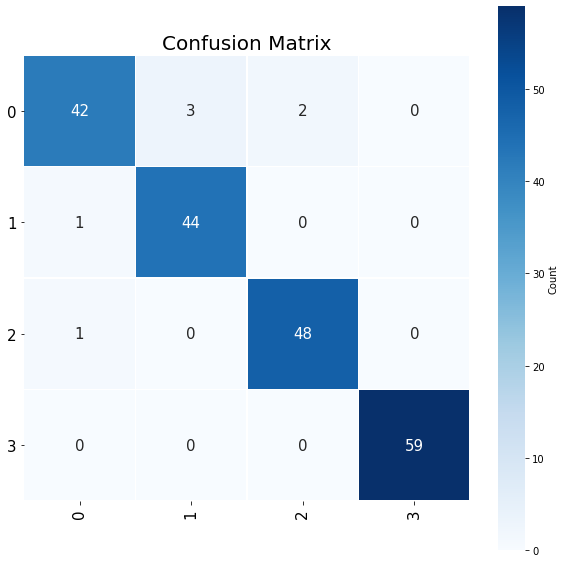

In [31]:
# Print confusion matrix and classification report.

classes = le.inverse_transform(np.arange(0, len(le.classes_)))
y_pred = best_model.predict(x_test_transformed)

print(classification_report(y_test, y_pred, digits = 4))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes,
            square=True, cbar_kws={'label': 'Count'},
            linewidths=.5, linecolor='white', annot_kws={'size': 15},
            cbar=True)
plt.title('Confusion Matrix', fontsize=20)
plt.yticks(rotation=0, fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.show()

In [33]:
# Check wrong predictions
wrong_predictions = pd.DataFrame(
    {'true_label': le.inverse_transform(y_test), 'predicted_label': le.inverse_transform(y_pred)})
wrong_predictions = wrong_predictions[wrong_predictions['true_label'] !=
                                      wrong_predictions['predicted_label']]
wrong_predictions

,true_label,predicted_label
2,0,1
62,0,2
83,2,0
86,0,2
116,0,1
130,0,1
131,1,0
